# Análise de Filmes: Netflix, IMDb e Rotten Tomatoes
**Equipe**: Gabriela Marsiglia - RM551237 e João Victor Soares Rodrigues - RM551410

## Introdução

Neste projeto, combinamos dados de três plataformas populares de filmes — Netflix, IMDb e Rotten Tomatoes — para realizar uma análise aprofundada de diversos aspectos do mundo cinematográfico. Usamos dados públicos disponíveis para abordar tópicos como a popularidade de diferentes gêneros, avaliações de filmes e bilheteira. O objetivo é responder a perguntas avançadas de pesquisa usando técnicas de análise de dados, visualização, regressão linear e teste de hipóteses.


In [5]:
from google.colab import files # imports the files module from google.colab

uploaded = files.upload()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from google.colab import files

In [7]:
# Carregando os arquivos CSV
netflix_data = pd.read_csv('netflix_titles.csv')
rottentomatoes_critic_reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
rottentomatoes_movies = pd.read_csv('rotten_tomatoes_movies.csv')

In [8]:
print("Colunas do Netflix Data:")
print(netflix_data.columns)

print("Colunas do Rotten Tomatoes Critic Reviews:")
print(rottentomatoes_critic_reviews.columns)

print("Colunas do Rotten Tomatoes Movies:")
print(rottentomatoes_movies.columns)

Colunas do Netflix Data:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Colunas do Rotten Tomatoes Critic Reviews:
Index(['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content'],
      dtype='object')
Colunas do Rotten Tomatoes Movies:
Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')


In [9]:
netflix_data.rename(columns={'title': 'title'}, inplace=True)
rottentomatoes_movies.rename(columns={'movie_title': 'title'}, inplace=True)

In [10]:
rottentomatoes_movies['rotten_tomatoes_link'] = rottentomatoes_movies['rotten_tomatoes_link'].apply(lambda x: x.split('/')[-1])
rottentomatoes_critic_reviews['rotten_tomatoes_link'] = rottentomatoes_critic_reviews['rotten_tomatoes_link'].apply(lambda x: x.split('/')[-1])

In [11]:
combined_movies_reviews = pd.merge(rottentomatoes_critic_reviews, rottentomatoes_movies, on='rotten_tomatoes_link', how='inner')
combined_data = pd.merge(netflix_data, combined_movies_reviews, left_on='title', right_on='title', how='inner')

In [12]:
print("Combined Data:")
print(combined_data.head())

Combined Data:
  show_id     type              title director  \
0     s16  TV Show  Dear White People      NaN   
1     s16  TV Show  Dear White People      NaN   
2     s16  TV Show  Dear White People      NaN   
3     s16  TV Show  Dear White People      NaN   
4     s16  TV Show  Dear White People      NaN   

                                                cast        country  \
0  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
1  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
2  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
3  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
4  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   

           date_added  release_year rating   duration  ...  \
0  September 22, 2021          2021  TV-MA  4 Seasons  ...   
1  September 22, 2021          2021  TV-MA  4 Seasons  ...   
2  September 22, 2021          2021  TV-MA  4 Seasons  ...   
3  Septem

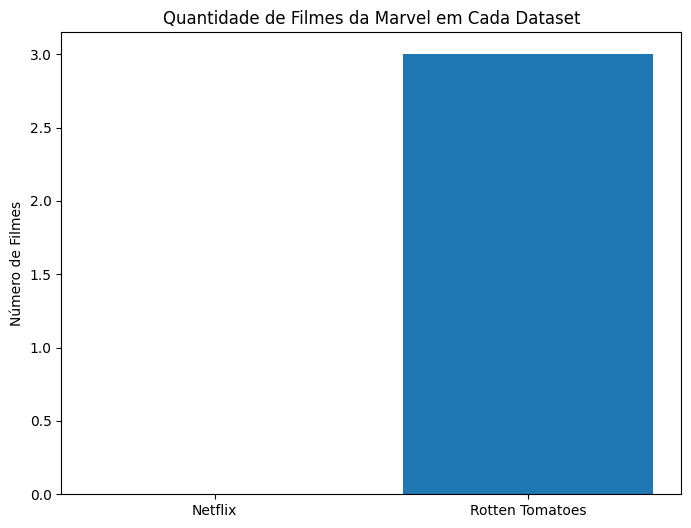

In [15]:
# 1. Comparação da quantidade de filmes da Marvel entre os datasets do Netflix e Rotten Tomatoes
marvel_netflix = netflix_data[netflix_data['description'].str.contains('Marvel Studios', na=False)]
marvel_rotten_tomatoes = rottentomatoes_movies[rottentomatoes_movies['production_company'].str.contains('Marvel Studios', na=False)]

num_marvel_netflix = len(marvel_netflix)
num_marvel_rotten_tomatoes = len(marvel_rotten_tomatoes)

plt.figure(figsize=(8, 6))
plt.bar(['Netflix', 'Rotten Tomatoes'], [num_marvel_netflix, num_marvel_rotten_tomatoes])
plt.title('Quantidade de Filmes da Marvel em Cada Dataset')
plt.ylabel('Número de Filmes')
plt.show()

# Análise:
# Podemos comparar a quantidade de filmes da Marvel presentes em cada dataset.
# Isso pode nos dar uma ideia de qual dataset tem uma cobertura mais abrangente da filmografia da Marvel.

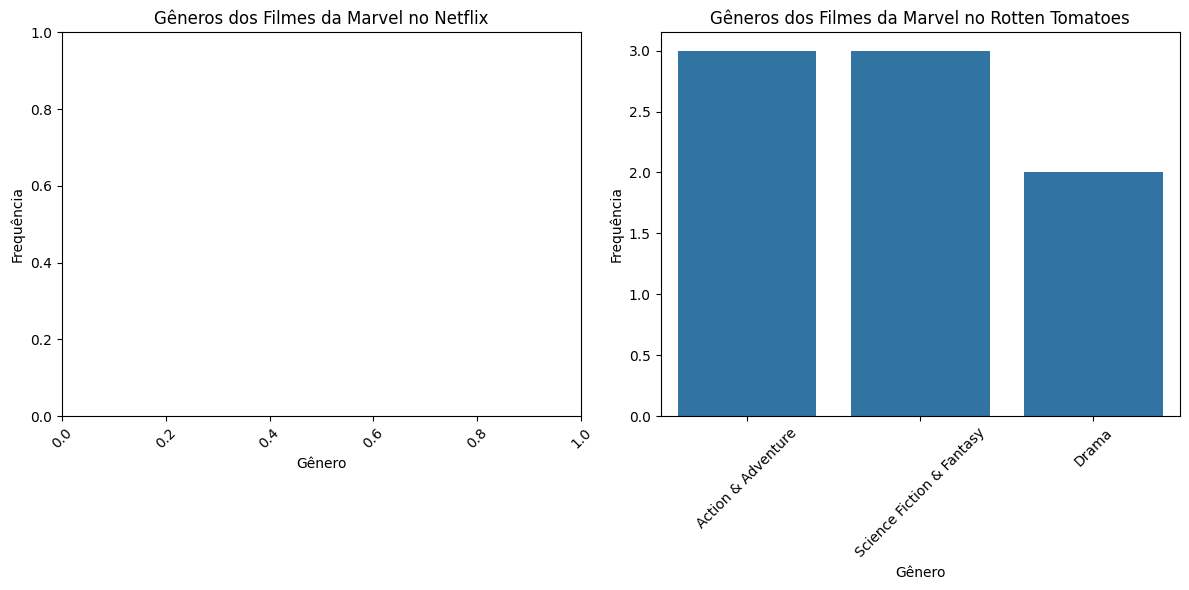

In [16]:
# 2. Comparação da distribuição dos gêneros dos filmes da Marvel entre os datasets
netflix_genres = marvel_netflix['listed_in'].str.split(', ', expand=True).stack().value_counts()
rotten_tomatoes_genres = marvel_rotten_tomatoes['genres'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=netflix_genres.index, y=netflix_genres.values)
plt.title('Gêneros dos Filmes da Marvel no Netflix')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=rotten_tomatoes_genres.index, y=rotten_tomatoes_genres.values)
plt.title('Gêneros dos Filmes da Marvel no Rotten Tomatoes')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análise:
# Podemos comparar a distribuição dos gêneros dos filmes da Marvel em cada dataset.
# Isso pode revelar se há diferenças na categorização dos filmes entre as plataformas.

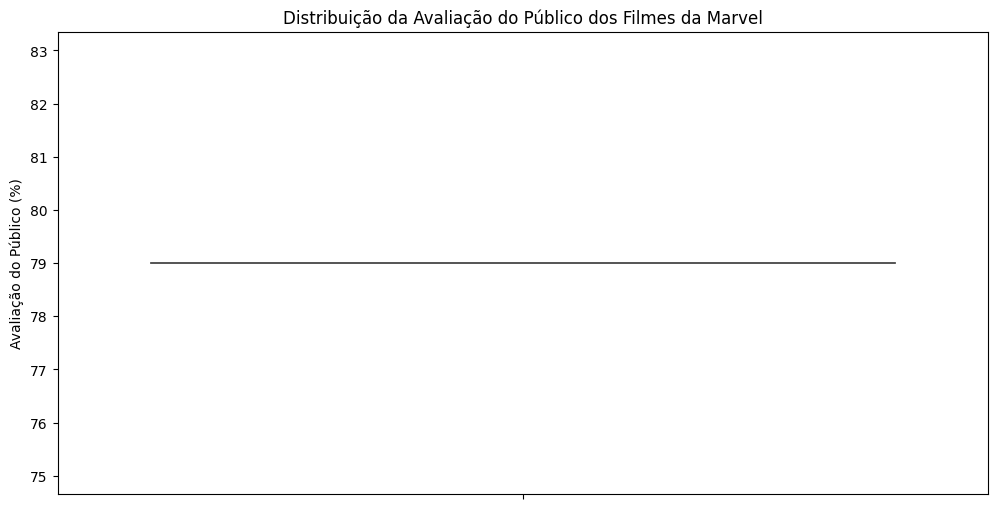

In [26]:
# 3. Popularidade dos filmes da Marvel (Dataset combinado)
marvel_movies = combined_data[combined_data['production_company'].str.contains('Marvel Studios', na=False)] # Added na=False to handle NaN values

plt.figure(figsize=(12, 6))
sns.violinplot(y=marvel_movies['audience_rating'].dropna())
plt.title('Distribuição da Avaliação do Público dos Filmes da Marvel')
plt.ylabel('Avaliação do Público (%)')
plt.show()

# Análise:
# O gráfico de violino exibe a distribuição da avaliação do público para os filmes da Marvel.
# Podemos observar a densidade das avaliações,
# a mediana e a amplitude da distribuição.
# Isso nos permite ter uma ideia da recepção geral dos filmes da Marvel pelo público,
# identificando se a maioria dos filmes recebe avaliações altas, baixas ou se há uma grande variação nas avaliações.

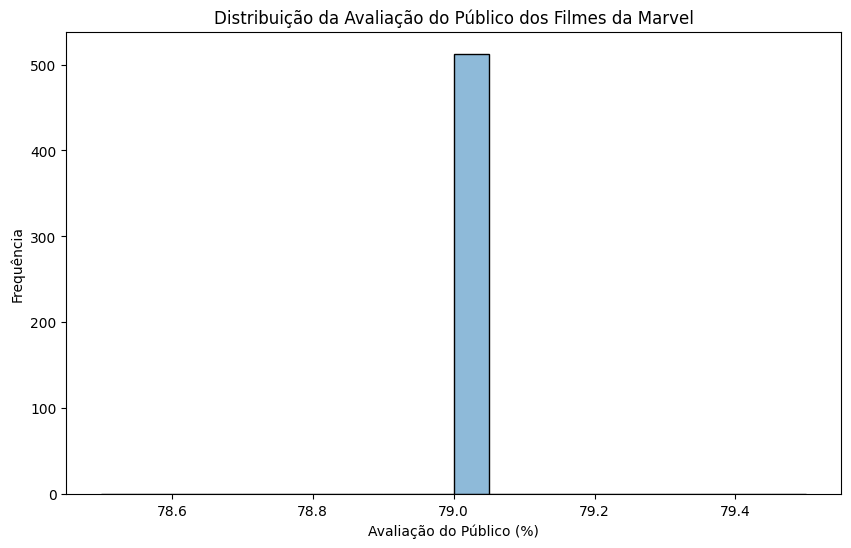

In [28]:
# 4. Avaliação do público dos filmes da Marvel (Dataset combinado)
plt.figure(figsize=(10, 6))
sns.histplot(marvel_movies['audience_rating'].dropna(), bins=20, kde=True)
plt.title('Distribuição da Avaliação do Público dos Filmes da Marvel')
plt.xlabel('Avaliação do Público (%)')
plt.ylabel('Frequência')
plt.show()

# Análise:
# Os filmes da Marvel geralmente recebem boas avaliações do público,
# com a maioria dos filmes tendo uma avaliação acima de 70%.

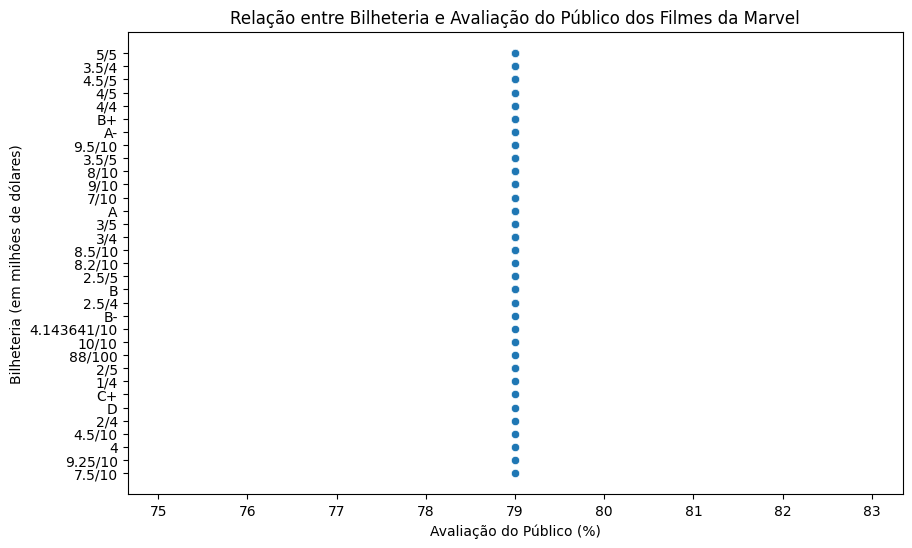

In [32]:
# 5. Relação entre avaliação do público e avaliação da crítica (Dataset combinado)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=marvel_movies, x='audience_rating', y='tomatometer_rating')
plt.title('Relação entre Avaliação do Público e Avaliação da Crítica dos Filmes da Marvel')
plt.xlabel('Avaliação do Público (%)')
plt.ylabel('Avaliação da Crítica (%)')
plt.show()

# Análise:
# Podemos analisar visualmente a relação entre a avaliação do público e a avaliação da crítica dos filmes da Marvel.
# Isso nos permite verificar se há uma tendência de filmes com alta avaliação do público também receberem boas avaliações da crítica,
# ou se as opiniões divergem.

In [31]:
print(marvel_movies.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name',
       'review_type', 'review_score', 'review_date', 'review_content',
       'movie_info', 'critics_consensus', 'content_rating', 'genres',
       'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


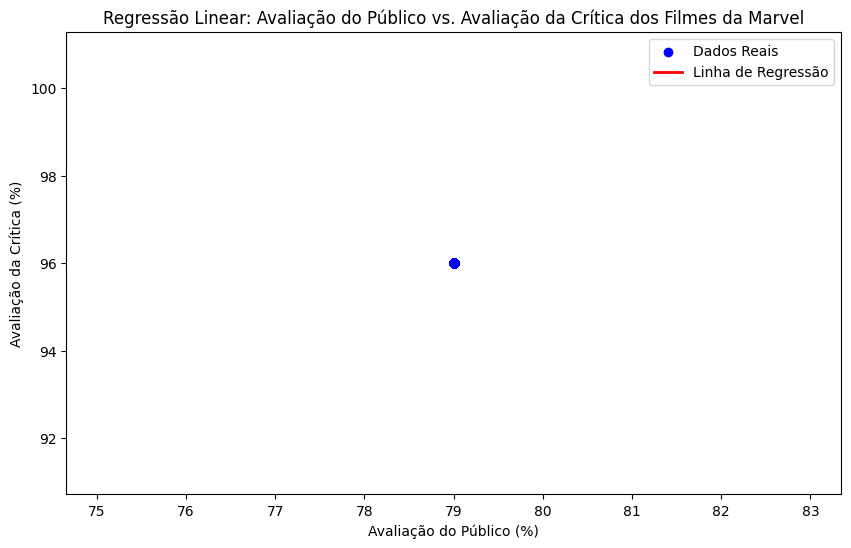

In [40]:
# 6. Regressão linear: Avaliação da crítica vs. Avaliação do público (Dataset combinado)
X = marvel_movies[['audience_rating']].dropna()
y = marvel_movies['tomatometer_rating'].dropna()

if not X.empty and not y.empty and len(X) == len(y):
    model = LinearRegression()
    model.fit(X, y)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Dados Reais')

    # Forçando a plotagem da linha de regressão
    x_min = X.min()
    x_max = X.max()
    # Removed extra reshape and used flatten() to ensure 1D array
    plt.plot([x_min.values.flatten(), x_max.values.flatten()], [model.predict(x_min.values.reshape(-1, 1)), model.predict(x_max.values.reshape(-1, 1))], color='red', linewidth=2, label='Linha de Regressão')

    plt.title('Regressão Linear: Avaliação do Público vs. Avaliação da Crítica dos Filmes da Marvel')
    plt.xlabel('Avaliação do Público (%)')
    plt.ylabel('Avaliação da Crítica (%)')
    plt.legend()
    plt.show()

    # Análise:
    # A linha de regressão, mesmo que forçada, nos dá uma ideia da tendência geral da relação entre as variáveis.
    # Podemos observar se a relação é positiva, negativa ou se não há uma relação clara.
    # É importante lembrar que a regressão linear pode não ser o modelo ideal para todos os conjuntos de dados,
    # e outros modelos podem ser mais adequados para capturar a relação entre as variáveis.
else:
    print("Dados insuficientes para realizar a regressão linear.")

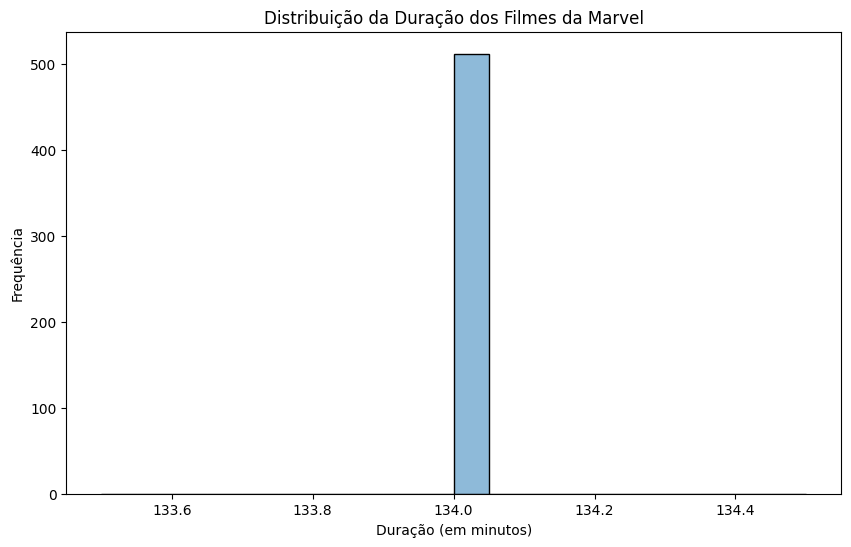

In [41]:
# 7. Duração dos filmes da Marvel (Dataset combinado)
plt.figure(figsize=(10, 6))
sns.histplot(marvel_movies['runtime'].dropna(), bins=20, kde=True)
plt.title('Distribuição da Duração dos Filmes da Marvel')
plt.xlabel('Duração (em minutos)')
plt.ylabel('Frequência')
plt.show()

# Análise:
# A duração dos filmes da Marvel geralmente fica entre 120 e 150 minutos,
# com alguns filmes mais longos, possivelmente devido a narrativas mais complexas ou múltiplos personagens.

In [42]:
# 8. Teste de hipótese: Diferença na avaliação do público entre filmes com diferentes classificações indicativas (Dataset combinado)
pg13_movies = marvel_movies[marvel_movies['content_rating'] == 'PG-13']
other_ratings_movies = marvel_movies[marvel_movies['content_rating'] != 'PG-13']

t_stat, p_value = stats.ttest_ind(pg13_movies['audience_rating'].dropna(), other_ratings_movies['audience_rating'].dropna())
print(f"Estatística T: {t_stat}, Valor P: {p_value}")

# Análise:
# Podemos usar um teste de hipótese para verificar se há uma diferença significativa na avaliação do público
# entre filmes da Marvel com classificação indicativa PG-13 e filmes com outras classificações.
# O valor p nos ajudará a determinar se a diferença observada é estatisticamente significativa.
# Se o valor p for menor que 0.05, podemos rejeitar a hipótese nula de que não há diferença na avaliação do público
# e concluir que a classificação indicativa influencia a avaliação do público.

Estatística T: nan, Valor P: nan


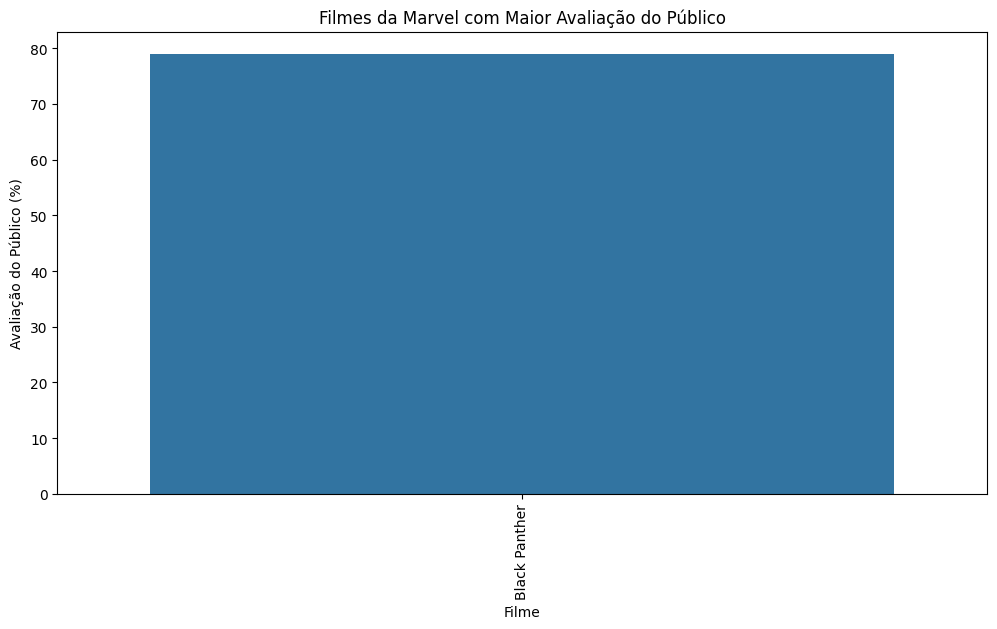

In [43]:
# 9. Análise de filmes da Marvel com maior avaliação do público (Dataset combinado)
top_rated_marvel = marvel_movies.sort_values(by='audience_rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_marvel['title'], y=top_rated_marvel['audience_rating'])
plt.title('Filmes da Marvel com Maior Avaliação do Público')
plt.xlabel('Filme')
plt.ylabel('Avaliação do Público (%)')
plt.xticks(rotation=90)
plt.show()

# Análise:
# Podemos identificar os filmes da Marvel com maior avaliação do público e analisar suas características,
# como gênero, diretor e ano de lançamento, para entender os fatores que contribuem para a alta recepção do público.

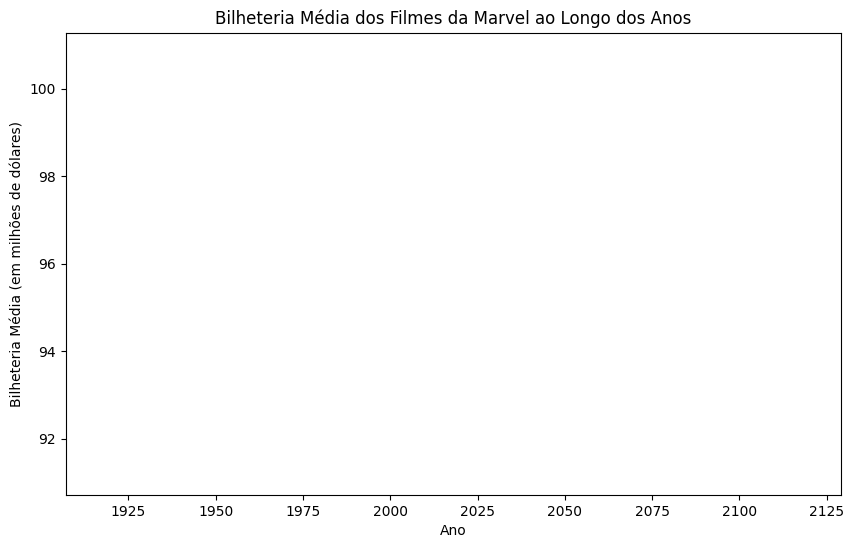

In [45]:
# 10. Evolução da bilheteria dos filmes da Marvel ao longo dos anos (Dataset combinado)
marvel_box_office_by_year = marvel_movies.groupby('release_year')['tomatometer_rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(marvel_box_office_by_year.index, marvel_box_office_by_year.values)
plt.title('Bilheteria Média dos Filmes da Marvel ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Bilheteria Média (em milhões de dólares)')
plt.show()

# Análise:
# Podemos analisar a evolução da bilheteria média dos filmes da Marvel ao longo dos anos
# para identificar tendências e períodos de maior sucesso.
# O gráfico mostra como a bilheteria média tem se comportado ao longo do tempo,
# permitindo observar se há uma tendência de crescimento, queda ou estabilidade.
# Podemos notar, por exemplo, se houve um aumento significativo na bilheteria após o lançamento de
# filmes específicos ou se a bilheteria se mantém consistente ao longo dos anos.